In [ ]:
#1 Set-Up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#Load data
df = pd.read_csv('Superstore.csv', encoding = 'latin1')

print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [ ]:
#Dataset Summary
print("\nDataset Summary:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nData Types:")
print(df.dtypes)


Dataset Summary:
Number of rows: 9994
Number of columns: 21

Data Types:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [ ]:
# Checking for any missing values
missing_values = df.isnull().sum()
print("\nNumber of missing Values in each column:")
print(missing_values)
print(f"Total missing values: {missing_values.sum()}")


Number of missing Values in each column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
Total missing values: 0


In [ ]:
#2 Basic EDA

print("\nStatistical Summary of Numerical Columns:")
print(df[['Sales', 'Quantity', 'Discount', 'Profit']].describe())


Statistical Summary of Numerical Columns:
              Sales     Quantity     Discount       Profit
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001     3.789574     0.156203    28.656896
std      623.245101     2.225110     0.206452   234.260108
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.728750
50%       54.490000     3.000000     0.200000     8.666500
75%      209.940000     5.000000     0.200000    29.364000
max    22638.480000    14.000000     0.800000  8399.976000


In [ ]:
# Convert 'Order Date' and 'Ship Date' columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Create a new column for 'YearMonth' based on 'Order Date'
df['YearMonth'] = df['Order Date'].dt.to_period('M')

print("\nDate range in the dataset:")
print(f"First Order Date: {df['Order Date'].min()}")
print(f"Last Order Date: {df['Order Date'].max()}")
print(f"Number of unique YearMonth values: {df['YearMonth'].nunique()}")


Date range in the dataset:
First Order Date: 2014-01-03 00:00:00
Last Order Date: 2017-12-30 00:00:00
Number of unique YearMonth values: 48


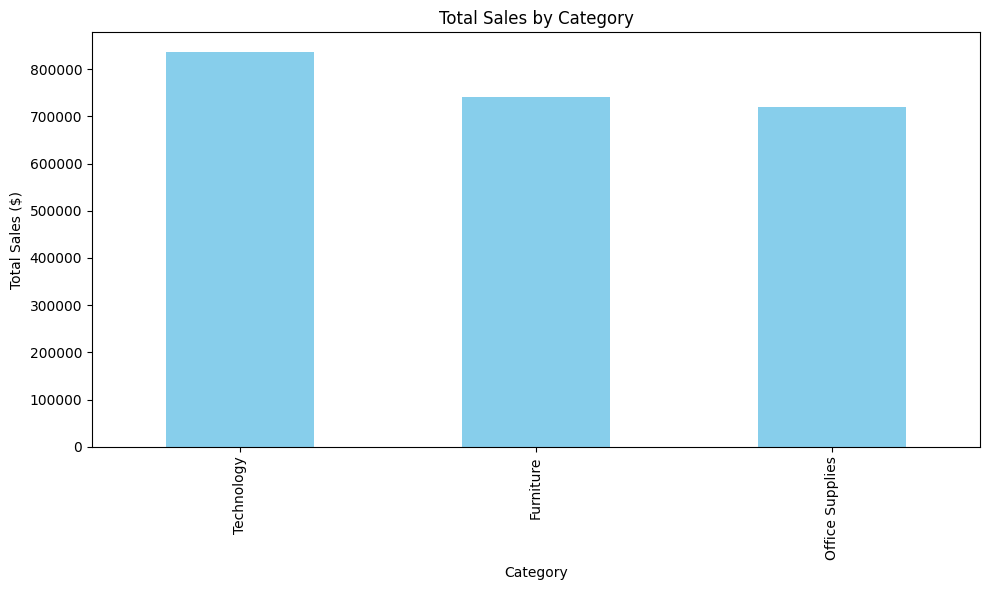

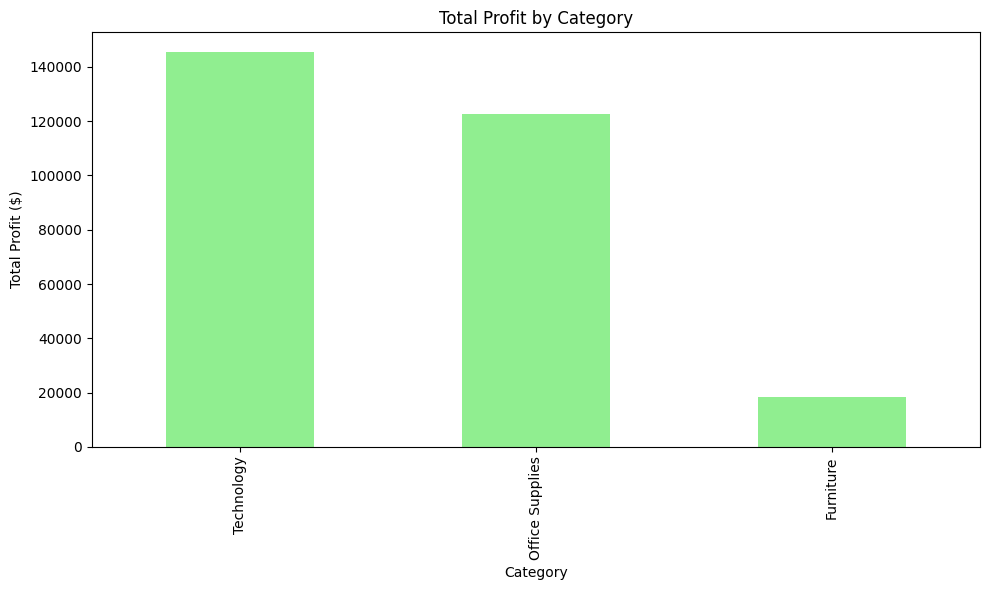

In [ ]:
#3 Visualizations and Insights

#Category Analysis

#Total Sales by Category
plt.figure(figsize=(10, 6))
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.savefig('sales_by_category.png')

#Total Profit by Category
plt.figure(figsize=(10, 6))
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
category_profit.plot(kind='bar', color='lightgreen')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit ($)')
plt.tight_layout()
plt.savefig('profit_by_category.png')

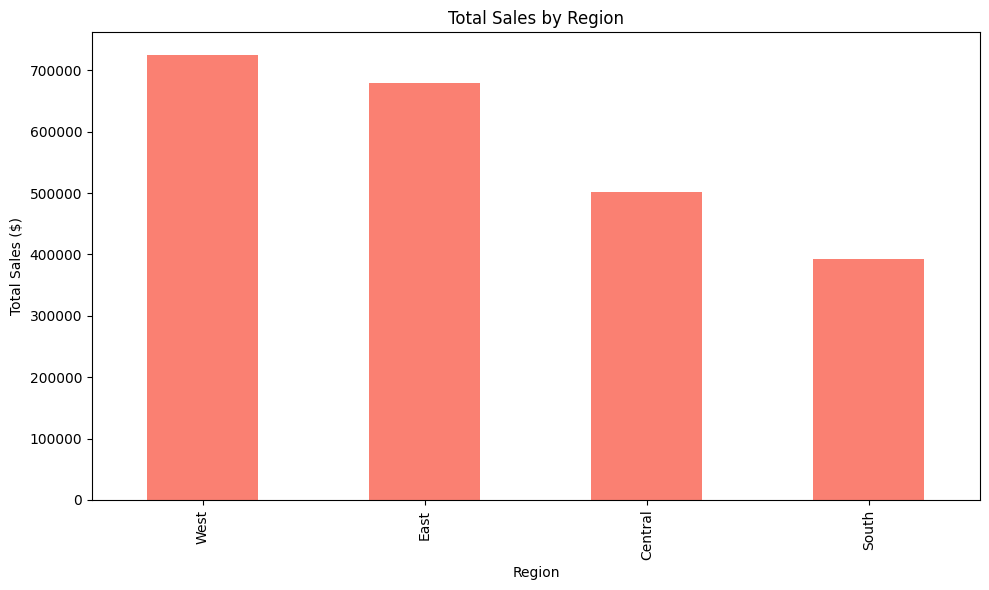

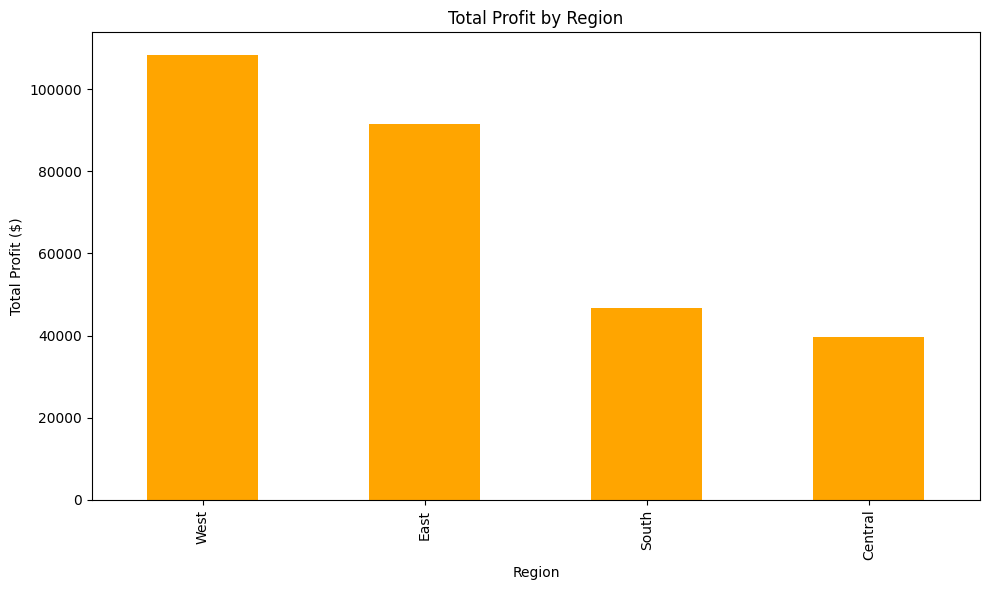

In [ ]:
#Total Sales by Region
plt.figure(figsize=(10, 6))
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', color='salmon')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.savefig('sales_by_region.png')

#Total Profit by Region
plt.figure(figsize=(10, 6))
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
region_profit.plot(kind='bar', color='orange')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit ($)')
plt.tight_layout()
plt.savefig('profit_by_region.png')

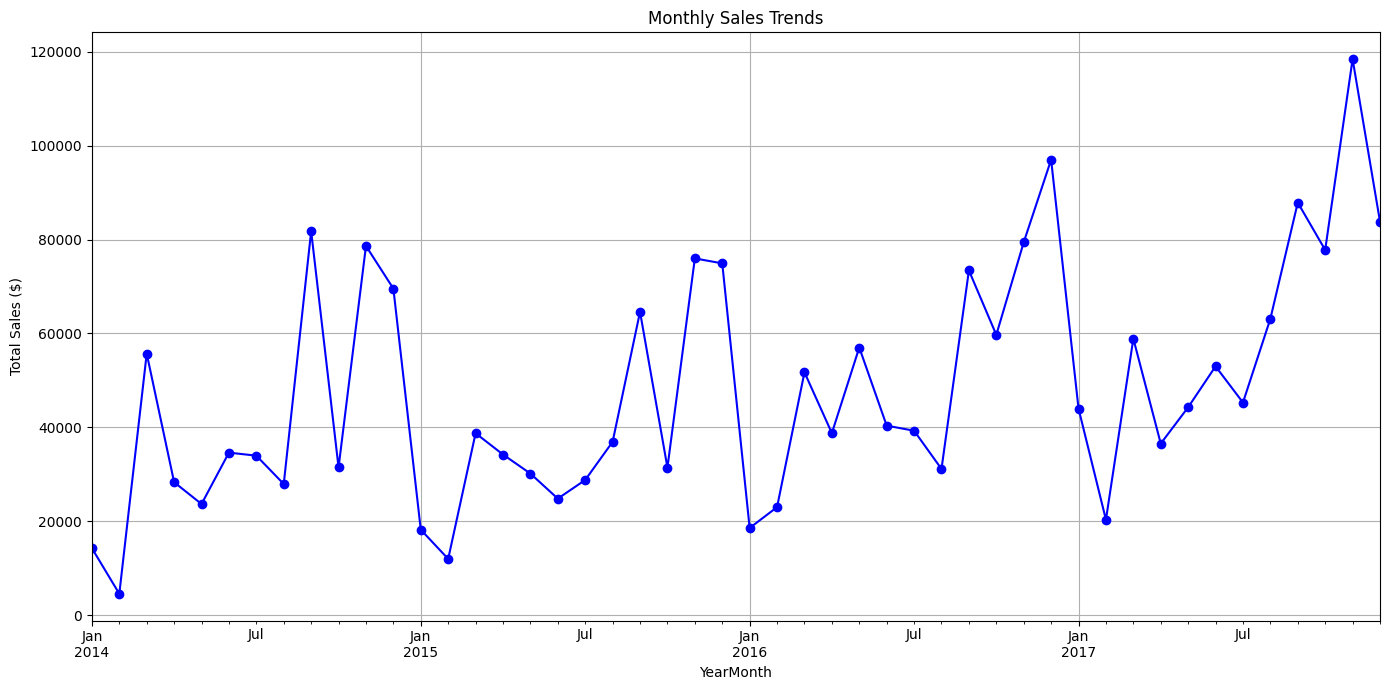

In [ ]:
#Trends Over Time

#Monthly Sales trends over time
monthly_sales = df.groupby('YearMonth')['Sales'].sum()
plt.figure(figsize=(14, 7))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trends')
plt.xlabel('YearMonth')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.savefig('monthly_sales_trend.png')

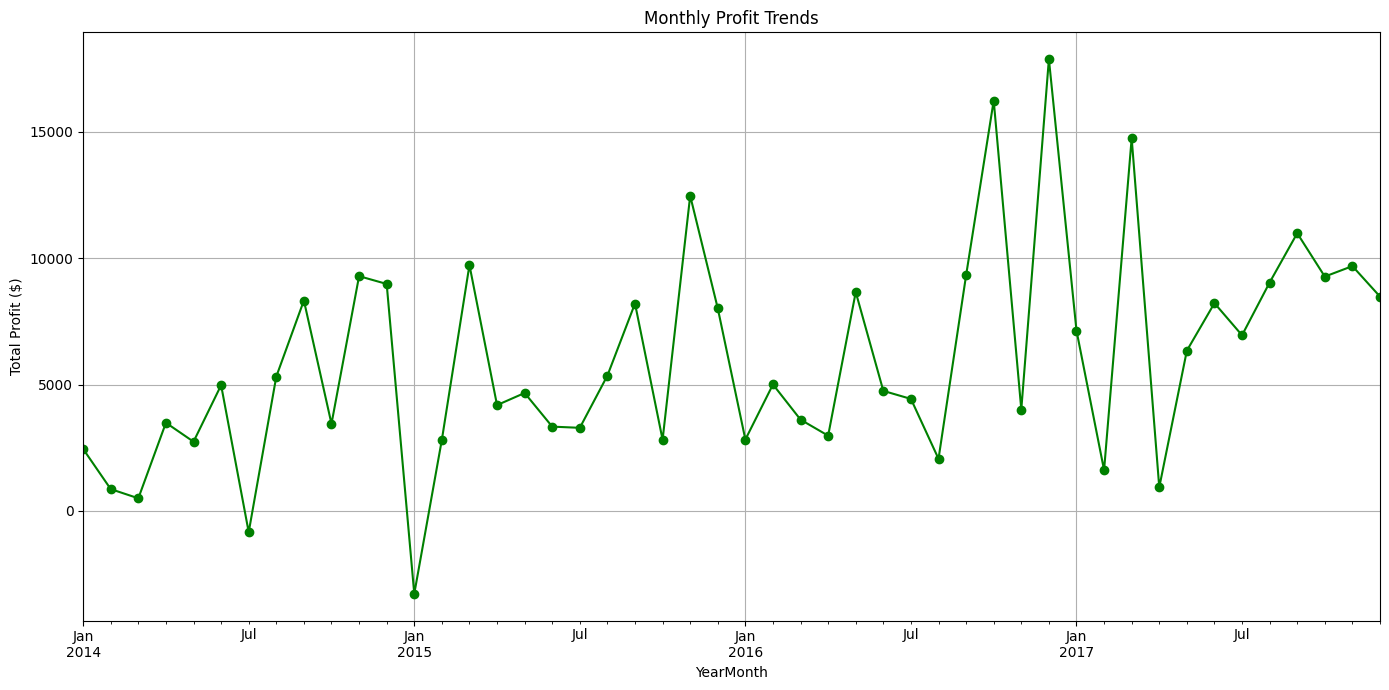

In [ ]:
#Monthly Profit Trends over time
monthly_profit = df.groupby('YearMonth')['Profit'].sum()
plt.figure(figsize=(14, 7))
monthly_profit.plot(kind='line', marker='o', color='green')
plt.title('Monthly Profit Trends')
plt.xlabel('YearMonth')
plt.ylabel('Total Profit ($)')
plt.grid(True)
plt.tight_layout()
plt.savefig('monthly_profit_trend.png')


Correlation Matrix:
             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200795 -0.028190  0.479064
Quantity  0.200795  1.000000  0.008623  0.066253
Discount -0.028190  0.008623  1.000000 -0.219487
Profit    0.479064  0.066253 -0.219487  1.000000


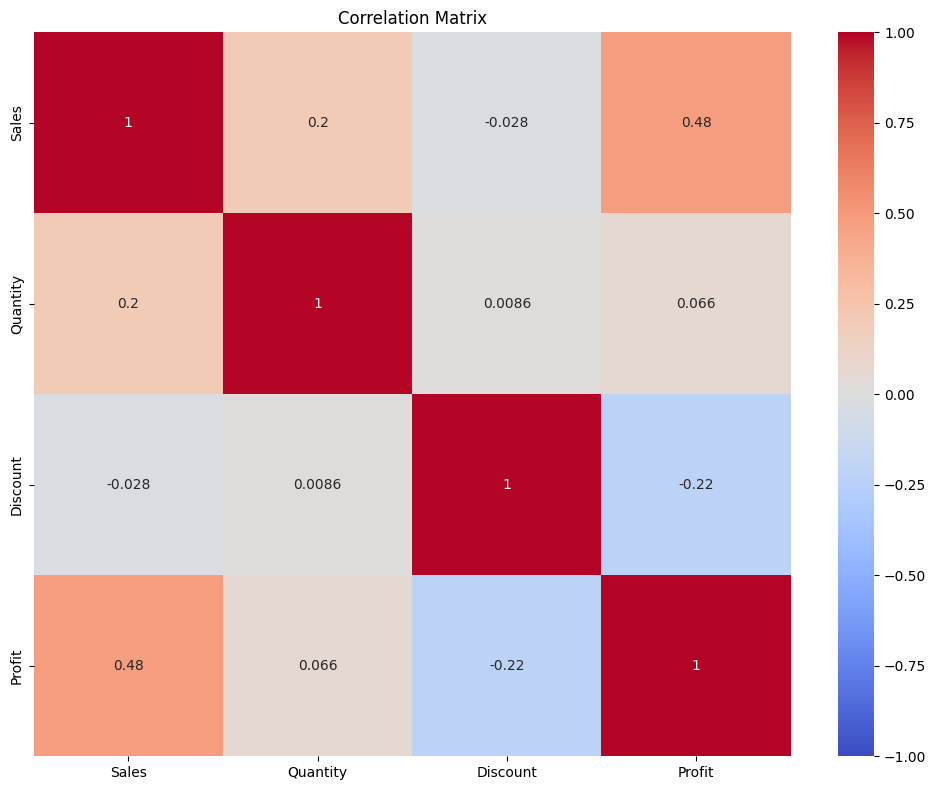

In [ ]:
#Correlation Analysis

#Correlation Matrix
correlation_matrix = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')

In [ ]:
#Deepen Analysis

# Sub-category Level Performance

# Top 5 sub-categories in terms of total sales
top_subcategories_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Sub-categories by Total Sales:")
print(top_subcategories_sales)

# Top 5 sub-categories in terms of total profit
top_subcategories_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Sub-categories by Total Profit:")
print(top_subcategories_profit)


Top 5 Sub-categories by Total Sales:
Sub-Category
Phones     330007.054
Chairs     328449.103
Storage    223843.608
Tables     206965.532
Binders    203412.733
Name: Sales, dtype: float64

Top 5 Sub-categories by Total Profit:
Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Name: Profit, dtype: float64


In [ ]:
# Bottom 5 sub-categories in terms of total sales
bottom_subcategories_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values().head(5)
print("\nBottom 5 Sub-categories by Total Sales:")
print(bottom_subcategories_sales)

# Bottom 5 sub-categories in terms of total profit
bottom_subcategories_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values().head(5)
print("\nBottom 5 Sub-categories by Total Profit:")
print(bottom_subcategories_profit)


Bottom 5 Sub-categories by Total Sales:
Sub-Category
Fasteners     3024.280
Labels       12486.312
Envelopes    16476.402
Art          27118.792
Supplies     46673.538
Name: Sales, dtype: float64

Bottom 5 Sub-categories by Total Profit:
Sub-Category
Tables      -17725.4811
Bookcases    -3472.5560
Supplies     -1189.0995
Fasteners      949.5182
Machines      3384.7569
Name: Profit, dtype: float64


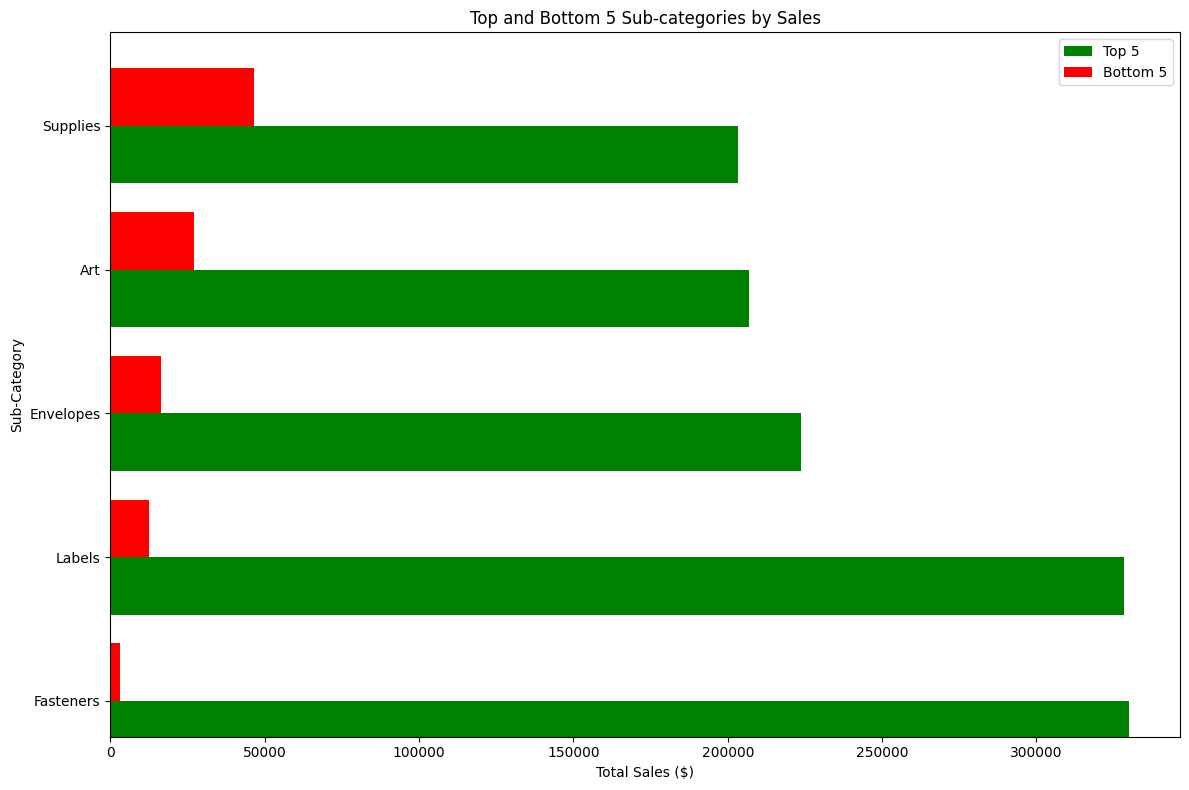

In [ ]:
# Visualizing top and bottom sub-categories by sales
plt.figure(figsize=(12, 8))
top_subcategories_sales.plot(kind='barh', color='green', position=1, width=0.4, label='Top 5')
bottom_subcategories_sales.plot(kind='barh', color='red', position=0, width=0.4, label='Bottom 5')
plt.title('Top and Bottom 5 Sub-categories by Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Sub-Category')
plt.legend()
plt.tight_layout()
plt.savefig('top_bottom_subcategories_sales.png')

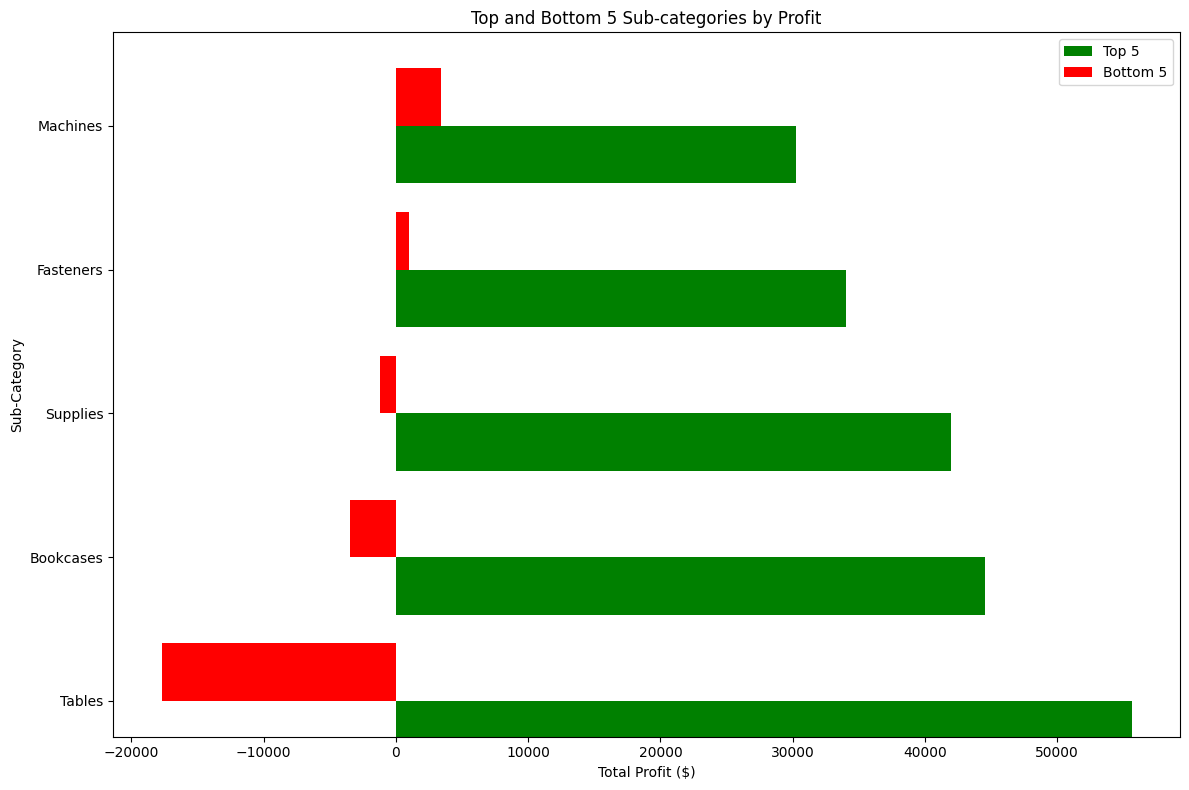

In [ ]:
# Visualizing top and bottom sub-categories by profit
plt.figure(figsize=(12, 8))
top_subcategories_profit.plot(kind='barh', color='green', position=1, width=0.4, label='Top 5')
bottom_subcategories_profit.plot(kind='barh', color='red', position=0, width=0.4, label='Bottom 5')
plt.title('Top and Bottom 5 Sub-categories by Profit')
plt.xlabel('Total Profit ($)')
plt.ylabel('Sub-Category')
plt.legend()
plt.tight_layout()
plt.savefig('top_bottom_subcategories_profit.png')

In [ ]:
# Impact of Shipping Modes

# Analyzing the effects of different 'Ship Mode' on 'Sales' and 'Profit'
ship_mode_analysis = df.groupby('Ship Mode').agg({
    'Sales': ['sum', 'mean'],
    'Profit': ['sum', 'mean']
})
print("\nImpact of Shipping Modes:")
print(ship_mode_analysis)


Impact of Shipping Modes:
                       Sales                   Profit           
                         sum        mean          sum       mean
Ship Mode                                                       
First Class     3.514284e+05  228.497024   48969.8399  31.839948
Same Day        1.283631e+05  236.396179   15891.7589  29.266591
Second Class    4.591936e+05  236.089239   57446.6354  29.535545
Standard Class  1.358216e+06  227.583067  164088.7875  27.494770


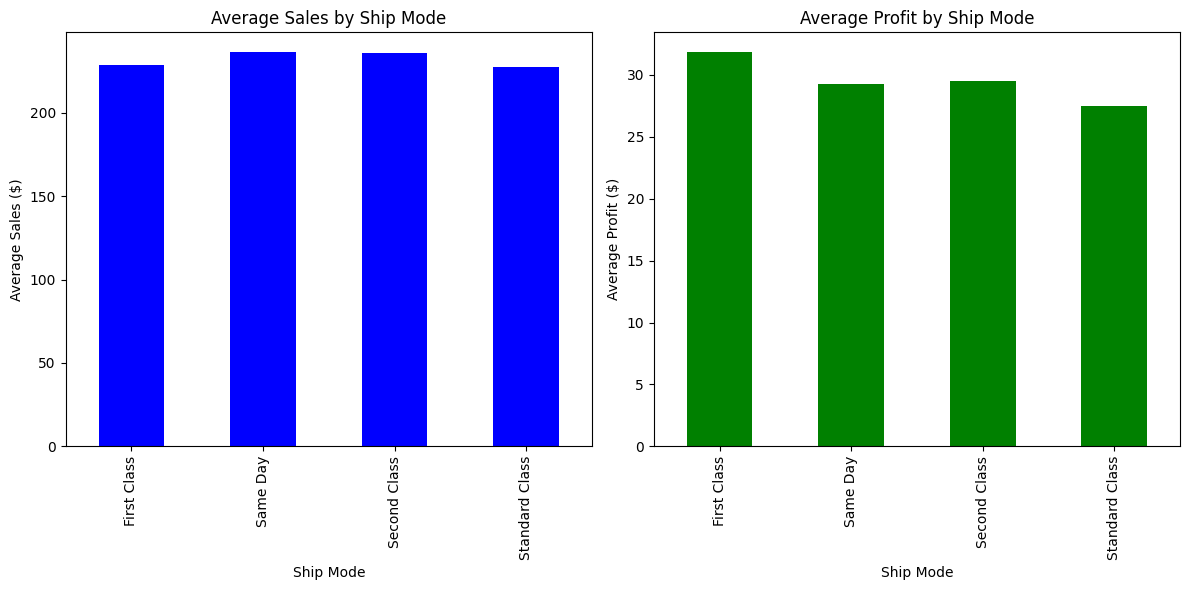

In [ ]:
# Visualizing ship mode impact on sales and profit
ship_mode_sales = df.groupby('Ship Mode')['Sales'].mean()
ship_mode_profit = df.groupby('Ship Mode')['Profit'].mean()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ship_mode_sales.plot(kind='bar', color='blue')
plt.title('Average Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Average Sales ($)')

plt.subplot(1, 2, 2)
ship_mode_profit.plot(kind='bar', color='green')
plt.title('Average Profit by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Average Profit ($)')

plt.tight_layout()
plt.savefig('ship_mode_impact.png')

In [ ]:
# Customer Segmentation

# Analyzing behavior of different customer segments
segment_analysis = df.groupby('Segment').agg({
    'Sales': ['sum', 'mean'],
    'Profit': ['sum', 'mean']
})
print("\nCustomer Segmentation Analysis:")
print(segment_analysis)


Customer Segmentation Analysis:
                    Sales                   Profit           
                      sum        mean          sum       mean
Segment                                                      
Consumer     1.161401e+06  223.733644  134119.2092  25.836873
Corporate    7.061464e+05  233.823300   91979.1340  30.456667
Home Office  4.296531e+05  240.972041   60298.6785  33.818664


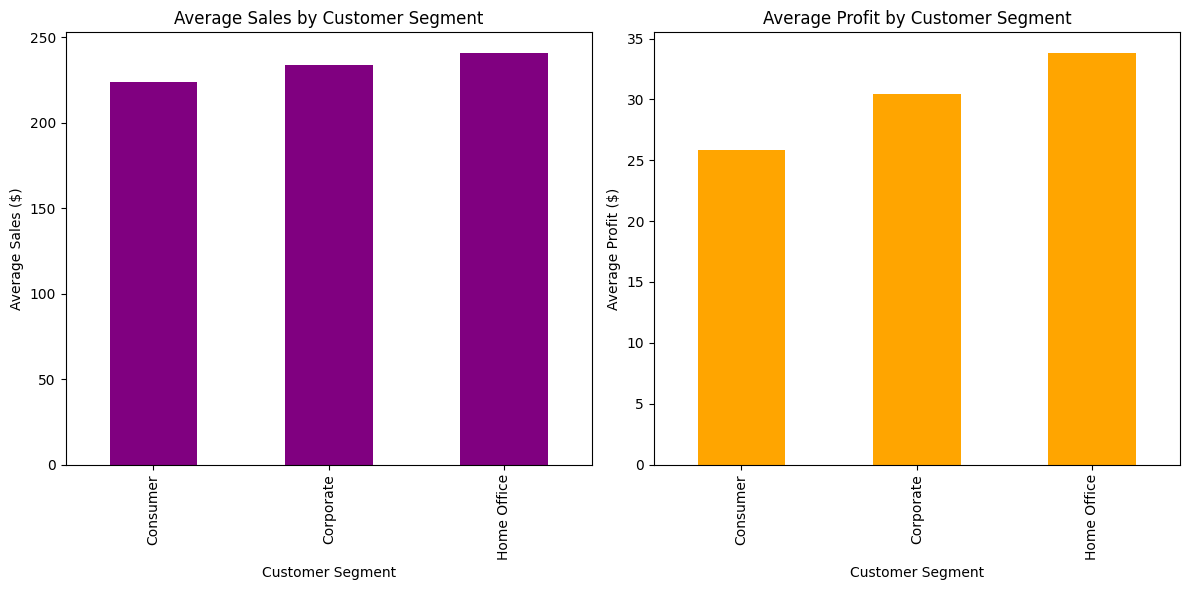

In [ ]:
# Visualizing customer segments by average sales and profit
segment_avg_sales = df.groupby('Segment')['Sales'].mean()
segment_avg_profit = df.groupby('Segment')['Profit'].mean()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
segment_avg_sales.plot(kind='bar', color='purple')
plt.title('Average Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Sales ($)')

plt.subplot(1, 2, 2)
segment_avg_profit.plot(kind='bar', color='orange')
plt.title('Average Profit by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Profit ($)')

plt.tight_layout()
plt.savefig('customer_segment_analysis.png')

In [ ]:
# 5. Marketing Strategy:

# Discount Impact Analysis

# Converting Order Date to just date (without time)
df['Order Date Day'] = df['Order Date'].dt.date

# Calculating daily total sales, profit, and average discount
daily_metrics = df.groupby('Order Date Day').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean'
}).reset_index()

# Analyzing the impact of discounts on total sales and profit
print("\nCorrelation between Daily Discount and Sales/Profit:")
print(f"Correlation between Daily Discount and Total Sales: {daily_metrics['Discount'].corr(daily_metrics['Sales']):.4f}")
print(f"Correlation between Daily Discount and Total Profit: {daily_metrics['Discount'].corr(daily_metrics['Profit']):.4f}")


Correlation between Daily Discount and Sales/Profit:
Correlation between Daily Discount and Total Sales: -0.0447
Correlation between Daily Discount and Total Profit: -0.2284


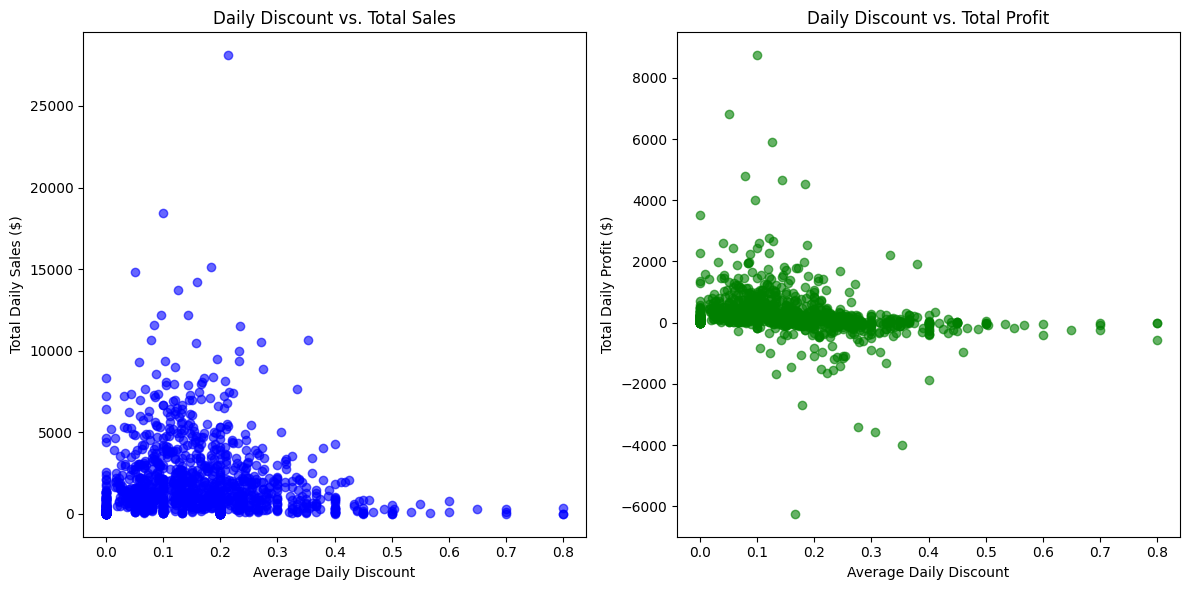

In [ ]:
# Creating scatter plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(daily_metrics['Discount'], daily_metrics['Sales'], alpha=0.6, color='blue')
plt.title('Daily Discount vs. Total Sales')
plt.xlabel('Average Daily Discount')
plt.ylabel('Total Daily Sales ($)')

plt.subplot(1, 2, 2)
plt.scatter(daily_metrics['Discount'], daily_metrics['Profit'], alpha=0.6, color='green')
plt.title('Daily Discount vs. Total Profit')
plt.xlabel('Average Daily Discount')
plt.ylabel('Total Daily Profit ($)')

plt.tight_layout()
plt.savefig('discount_impact_analysis.png')

# Report

##1.  Data Overview
->The dataset contains 9994 rows and 21 columns.

->Columns include object types , datetime64 for dates, and float/int for numeric features like Sales, Profit, and Quantity.

->There are no missing values in the dataset.

##2. Statistical Summary

->Mean Sales- $229.86

->Std Dev-  $623.25

->Range of Profit:

->Min and max peofit  [-$6599.98 , $8399.98]


-> There are 793 unique customers.

##3. Date Conversion
-> You created a new YearMonth column, there are 48 unique months


->First Order: 2014-01-03

->Last Order: 2017-12-30

#Part 2: Visualizations and Insights
##1. Category Analysis
->Highest Sales: Technology

->Highest Profit: Technology

->Region with Lowest Sales: South

##2. Trends Over Time
the graph shows a general upward trend with the heighest peaks often in quarter 4

Profit also follows a similar trend with soime months with lower profits.



##3. Correlation Analysis
Correlation plot shows a high Positive correlation meaning higher sales  yield higher profits.

Discount vs Profit Correlation: graph shows negative correlation as discounts increase, profit tends to decrease

#Part 3: Deepen Analysis
##1. Sub-category Level Performance
Top 5 by Sales: Phones, Chairs, Storage, Tables, Binders
 Top 5 Sub-Categories by Total Sales:
Sub-Category
Phones     330007.054
Chairs     328449.103
Storage    223843.608
Tables     206965.532
Binders    203412.733
Name: Sales, dtype: float64

->Bottom 5 by Profit: Tables, Bookcases, Supplies, Binders, Fasteners
 Bottom 5 Sub-Categories by Total Profit:
Sub-Category
Tables      -17725.4811
Bookcases    -3472.5560
Supplies     -1189.0995
Fasteners      949.5182
Machines      3384.7569

-> Some high-sales sub-categories like Tables and Binders are also among the lowest in profit meaning poor margins or excessive discounting.

##2. Impact of Shipping Modes
Highest Avg Sales: Same Day
Average Sales: 236.4


Highest Avg Profit: First Class
Average Profit: 31.84

-> Faster shipping doesn't always mean better profits. First Class seems to balance speed with profitable transactions.

##3. Customer Segmentation
Highest Avg Sales: Corporate
Average Sales: 240.97

Highest Avg Profit: Home Office
Average Profit: 33.82

->  While Corporate customers buy more, Home Office customers contribute more to profits, possibly due to higher-margin items or fewer discounts.

##Part 4: Marketing Strategy
1. Discount Impact Analysis
Sales vs Discount scatter plot:
->Very weak negative correlation (-0.019)
Discounts don't appear to substantially increase sales volume

Profit vs Discount Scatter plot: Moderate negative correlation (-0.410)
Higher discount rates are associated with lower profits

###Correlation:

Discount vs Sales: Slightly negitive

Discount vs Profit: Negative

2. Strategic Recommendations
Conclusion:
Discounts do not significantly boost profits and may even reduce them due to shrinking margins. Although they increase sales volume slightly, the trade-off isn't always worth it.

##Recommendation:
As per the analysis, discounting doesn't necessarily lead to higher sales and significantly reduces profit. The statistics show a moderate negative correlation between discounts and profits.

Recommendations for using discounting as a marketing strategy:
Exercise caution when providing discounts - Use high discounts on selective inventory to clear rather than applying it in general
Apply focused discounting - Various segments react differently to discounting; research segment-based strategies
Re-price furniture prices and discounts - Tables and Bookcases are loss-leading; rethink their discount and price strategy
Employ seasonal discount strategy - Consider strategic discounting in low-sales months rather than peak seasons
Create strategic product bundles - Bundle high-margin with low-margin products rather than offering direct discounts
Explore alternative promotions - Consider free shipping, loyalty rewards, or added-value services rather than price reductions
As a general recommendation, the Superstore needs to move from mass discounting to a more tactical strategy that preserves margins while attracting consumers in.